In [7]:
from google.colab import files
uploaded = files.upload()

Saving traffic.csv to traffic (1).csv


In [8]:
import pandas as pd

# Load the uploaded file
df = pd.read_csv('traffic.csv')

# Display structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB
None
   event        date       country      city  \
0  click  2021-08-21  Saudi Arabia    Jeddah   
1  click  2021-08-21  Saudi Arabia    Jeddah   
2  click  2021-08-21         India  Ludhiana   
3  click  2021-08-21        France   Unknown   
4  click  2021-08-21      Maldives      Malé   

                              artist          album          track  \
0                             Tesher    Jalebi Baby    Jalebi Baby 

In [9]:
# Check for missing values
print(df.isnull().sum())

# Drop rows missing key geographic or artist info
df = df.dropna(subset=['country', 'city', 'artist'])

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Fill other missing values with 'Unknown'
df = df.fillna('Unknown')

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64


In [10]:
# Top 10 countries
print("Top 10 Countries:\n", df['country'].value_counts().head(10))

# Top 10 cities
print("Top 10 Cities:\n", df['city'].value_counts().head(10))

# Top 10 artists
print("Top 10 Artists:\n", df['artist'].value_counts().head(10))

# Time period covered
print("Date range:", df['date'].min(), "to", df['date'].max())

Top 10 Countries:
 country
Saudi Arabia            47334
India                   42992
United States           32525
France                  15661
Iraq                     8260
United Kingdom           5970
Pakistan                 5644
Germany                  4792
United Arab Emirates     3702
Turkey                   3514
Name: count, dtype: int64
Top 10 Cities:
 city
Jeddah         22791
Riyadh         17454
Unknown        16653
Hyderabad       3682
Dammam          3276
Erbil           3105
Kuwait City     3010
Lucknow         2808
Muscat          2717
Delhi           2567
Name: count, dtype: int64
Top 10 Artists:
 artist
Tesher                                                          40841
Anne-Marie                                                      10650
Tundra Beats                                                     9751
Surf Mesa, Emilee                                                7533
DMNDS, Strange Fruits Music, Fallen Roses, Lujavo, Nito-Onna     5512
Reyanna Maria   

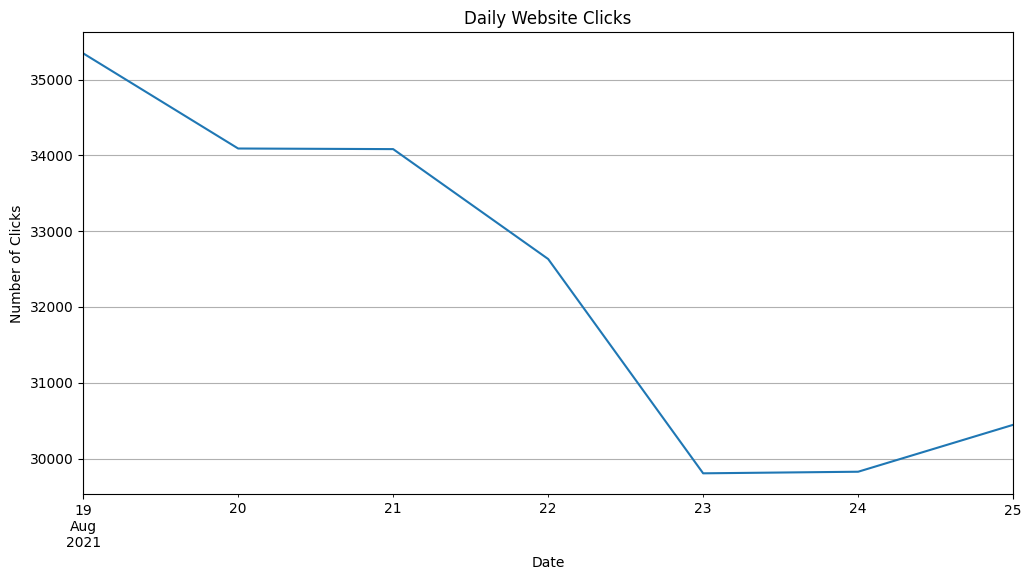

In [11]:
import matplotlib.pyplot as plt

daily_traffic = df.groupby('date').size()

plt.figure(figsize=(12,6))
daily_traffic.plot()
plt.title("Daily Website Clicks")
plt.xlabel("Date")
plt.ylabel("Number of Clicks")
plt.grid(True)
plt.show()

/tmp/ipython-input-12-1643980605.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


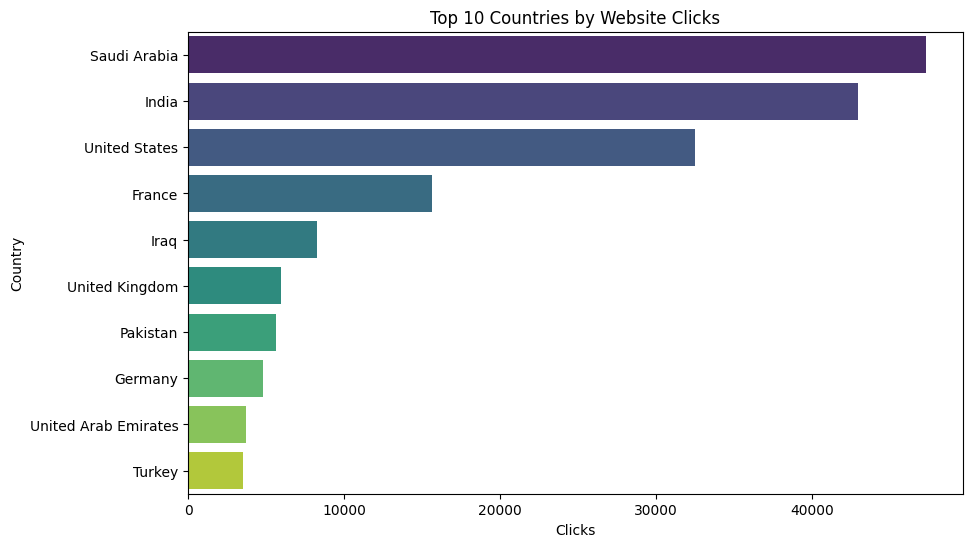

In [12]:
import seaborn as sns

top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Website Clicks")
plt.xlabel("Clicks")
plt.ylabel("Country")
plt.show()

In [13]:
print("Top 10 Tracks:\n", df['track'].value_counts().head(10))
print("\nTop 10 Albums:\n", df['album'].value_counts().head(10))
print("\nTop 10 Artists:\n", df['artist'].value_counts().head(10))

Top 10 Tracks:
 track
Jalebi Baby                              40841
Beautiful                                10658
Beautiful Day                             9751
ily (i love you baby) (feat. Emilee)      7533
So Pretty                                 5661
Calabria (feat. Lujavo & Nito-Onna)       5512
Summer of Love (Shawn Mendes & Tainy)     5409
Candy Shop                                5375
Late At Night                             5036
Build a Bitch                             3879
Name: count, dtype: int64

Top 10 Albums:
 album
Jalebi Baby                             40841
Beautiful                               10649
Beautiful Day                            9750
ily (i love you baby) (feat. Emilee)     7533
The Massacre                             5984
So Pretty                                5661
Calabria (feat. Lujavo & Nito-Onna)      5512
Summer Of Love                           5409
Late At Night                            5036
SOUR                                     3891

In [14]:
df.to_csv('cleaned_traffic.csv', index=False)
from google.colab import files
files.download('cleaned_traffic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>